# fashion-mninst-CNN
---

## 1) 패키지 준비하기

In [1]:
from pandas import read_excel
from pandas import DataFrame
from pandas import merge
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.metrics import classification_report, confusion_matrix

# (신규) CNN 방식의 모델을 구성하기 위해 추가적으로 사용되는 레이어 객체
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

from sklearn.model_selection import train_test_split

## 2) 데이터셋 준비하기

In [32]:
(x_train, y_train), (x_test, y_test) = load_data()

## 3) 데이터 전처리

### 결측치 확인

- 결측치 등의 데이터 이상점이 없는 예제 데이터 이므로 생략

## 4) 탐색적 데이터 분석

### 훈련 데이터 형태 확인

In [33]:
print(x_train.shape, y_train.shape)
print(y_train)

(60000, 28, 28) (60000,)
[9 0 0 ... 3 0 5]


### 검증 데이터의 형태 확인

In [34]:
print(x_test.shape, y_test.shape)
print(y_test)

(10000, 28, 28) (10000,)
[9 2 1 ... 8 1 5]


In [35]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 임의의 샘플 값 확인

In [36]:
for i in x_train[1]:
    for j in i:
        print("%03d" % j, end="")
    print()

000000000000000001000000000000041188103054048043087168133016000000000000000000000000
000000000001000000000049136219216228236255255255255217215254231160045000000000000000
000000000000000014176222224212203198196200215204202201201201209218224164000000000000
000000000000000188219200198202198199199201196198198200200200200201200225041000000000
000000000000051219199203203212238248250245249246247252248235207203203222140000000000
000000000000116226206204207204101075047073048050045051063113222202206220224000000000
000000000000200222209203215200000070098000103059068071049000219206214210250038000000
000000000000247218212210215214000254243139255174251255205000215217214208220095000000
000000000045226214214215224205000042035060016017012013070000189216212206212156000000
000000000164235214211220216201052071089094083078070076092087206207222213219208000000
000000000106187223237248211198252250248245248252253250252239201212225215193113000000
00000000000000001705415922219320819219720020020020020120319521016

In [37]:
print(y_train[1])

0


### 데이터 그려보기

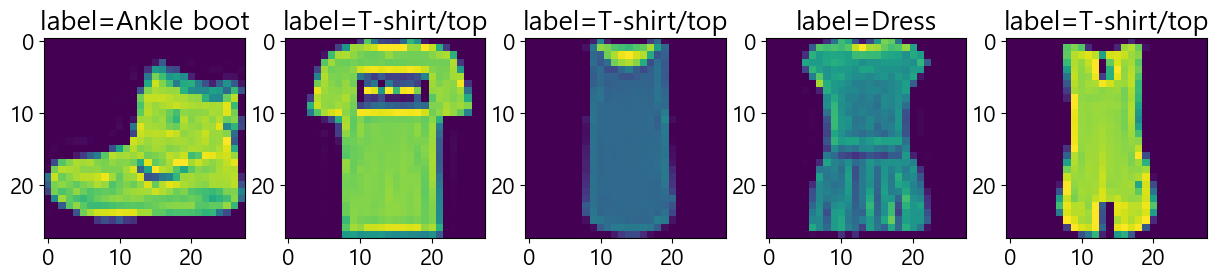

In [38]:
fig, ax = plt.subplots(1, 5, figsize=(15, 3), dpi=100)

for i in range(0, len(ax)):
    train = x_train[i]
    label = y_train[i]
    ax[i].imshow(train)
    ax[i].set_title("label=%s" % class_names[label])

plt.show()
plt.close()

## 5) 데이터셋 분할하기

### 랜덤시드 고정

In [39]:
np.random.seed(777)

### 훈련 데이터와 검증 데이터로 분할

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)
print(f'훈련 데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 {x_test.shape} 레이블 {y_test.shape}')

훈련 데이터 (42000, 28, 28) 레이블 (42000,)
검증 데이터 (18000, 28, 28) 레이블 (18000,)


### one-hot-encoding

In [11]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(y_test_one_hot)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [41]:
x_train_reshape = x_train.reshape(x_train.shape[0], x_train.shape[1] , x_train.shape[2], 1)
x_test_reshape = x_test.reshape(x_test.shape[0], x_test.shape[1] , x_test.shape[2], 1)
print(f'훈련 데이터 {x_train_reshape.shape} / 검증 데이터 {x_train_reshape.shape}')
print(x_train_reshape[0])

훈련 데이터 (42000, 28, 28, 1) / 검증 데이터 (42000, 28, 28, 1)
[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  

### 이미지 데이터 정규화

각 픽셀의 색상값은 0~255사이의 값을 갖는다.

그러므로 색상값을 255로 나누면 0~1 사이의 범위를 갖도록 데이터 정규화가 수행된다.

In [42]:
x_train_normal = x_train_reshape / 255
x_test_normal = x_test_reshape / 255
x_train_normal[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

## 6) 모델 개발

### 모델 정의

In [43]:
model = Sequential()

# Conv2D -> 영상이나 이미지의 특징을 확인하기 위한 함수
# - filters: 필터(커널)의 개수
# - kernel_size: 필터의 크기
# - strides: 필터의 이동 간격
# - padding: valid(패딩 없음), same(인풋과 아웃풋이 같도록 패딩)
# - activation: 활성화 함수
# - input_shape: 첫 레이어에 인풋으로 들어오는 크기
model.add(Conv2D(filters=32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)))

model.add(BatchNormalization())
# MaxPool2D -> 컨볼루션 레이어의 출력 이미지에서 주요값만 뽑아 크기가 작은 출력 영상을 만든다.
# - pool_size: 축소시킬 필터의 크기(비율)
# - strides: 필터의 이동 간격. 기본값으로 pool_size를 갖는다.
# - 일반적으로 strides는 pool_size와 동일하게 적용되므로 생략하는 편.
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Dropout(0.25))
# 이전보다 filter는 크게, kelnel_size는 작게, input_shape는 최초에만 적용하므로 여기서는 생략
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# 1차원으로 변환하기 위한 Layer
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# 최종 아웃풋의 수는 one_hot_encoding의 원소 수 만큼
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1606144   
_________________________________________________________________
dense_6 (Dense)              (None, 256)              

### 학습하기

In [44]:
result = model.fit(x_train_normal, y_train_one_hot, epochs=500, validation_data=(x_test_normal, y_test_one_hot), callbacks = [
    #ModelCheckpoint(filepath = 'check_point.h5', monitor = 'val_loss', verbose=1, save_best_only = True),
    EarlyStopping(monitor = 'val_loss', patience=5, verbose = 1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.0001, verbose=1)
])

result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/500
1313/1313 [==============================] - 39s 29ms/step - loss: 0.4489 - acc: 0.8341 - val_loss: 0.2996 - val_acc: 0.8916
Epoch 2/500
1313/1313 [==============================] - 41s 32ms/step - loss: 0.2849 - acc: 0.8943 - val_loss: 0.2573 - val_acc: 0.9069
Epoch 3/500
1313/1313 [==============================] - 39s 30ms/step - loss: 0.2379 - acc: 0.9105 - val_loss: 0.2484 - val_acc: 0.9068
Epoch 4/500
1313/1313 [==============================] - 40s 30ms/step - loss: 0.2051 - acc: 0.9222 - val_loss: 0.2483 - val_acc: 0.9143
Epoch 5/500
1313/1313 [==============================] - 39s 30ms/step - loss: 0.1763 - acc: 0.9328 - val_loss: 0.2410 - val_acc: 0.9167
Epoch 6/500
1313/1313 [==============================] - 37s 28ms/step - loss: 0.1496 - acc: 0.9437 - val_loss: 0.2843 - val_acc: 0.9134s - loss: 0.14
Epoch 7/500
1313/1313 [==============================] - 38s 29ms/step - loss: 0.1273 - acc: 0.9519 - val_loss: 0.2580 - val_acc: 0.9186
Epoch 8/500
1313/1313 [====

,loss,acc,val_loss,val_acc,lr
epochs,,,,,
1,0.448934,0.834071,0.299624,0.891611,0.0010
2,0.284853,0.894333,0.257311,0.906889,0.0010
3,0.237920,0.910476,0.248372,0.906778,0.0010
4,0.205054,0.922167,0.248307,0.914333,0.0010
5,0.176302,0.932833,0.240966,0.916667,0.0010
6,0.149551,0.943690,0.284322,0.913444,0.0010
7,0.127318,0.951905,0.257982,0.918556,0.0010
8,0.110573,0.958571,0.304633,0.909167,0.0010
9,0.062154,0.976929,0.321805,0.923278,0.0005


## 7) 학습 결과 평가

### 학습 결과 시각화

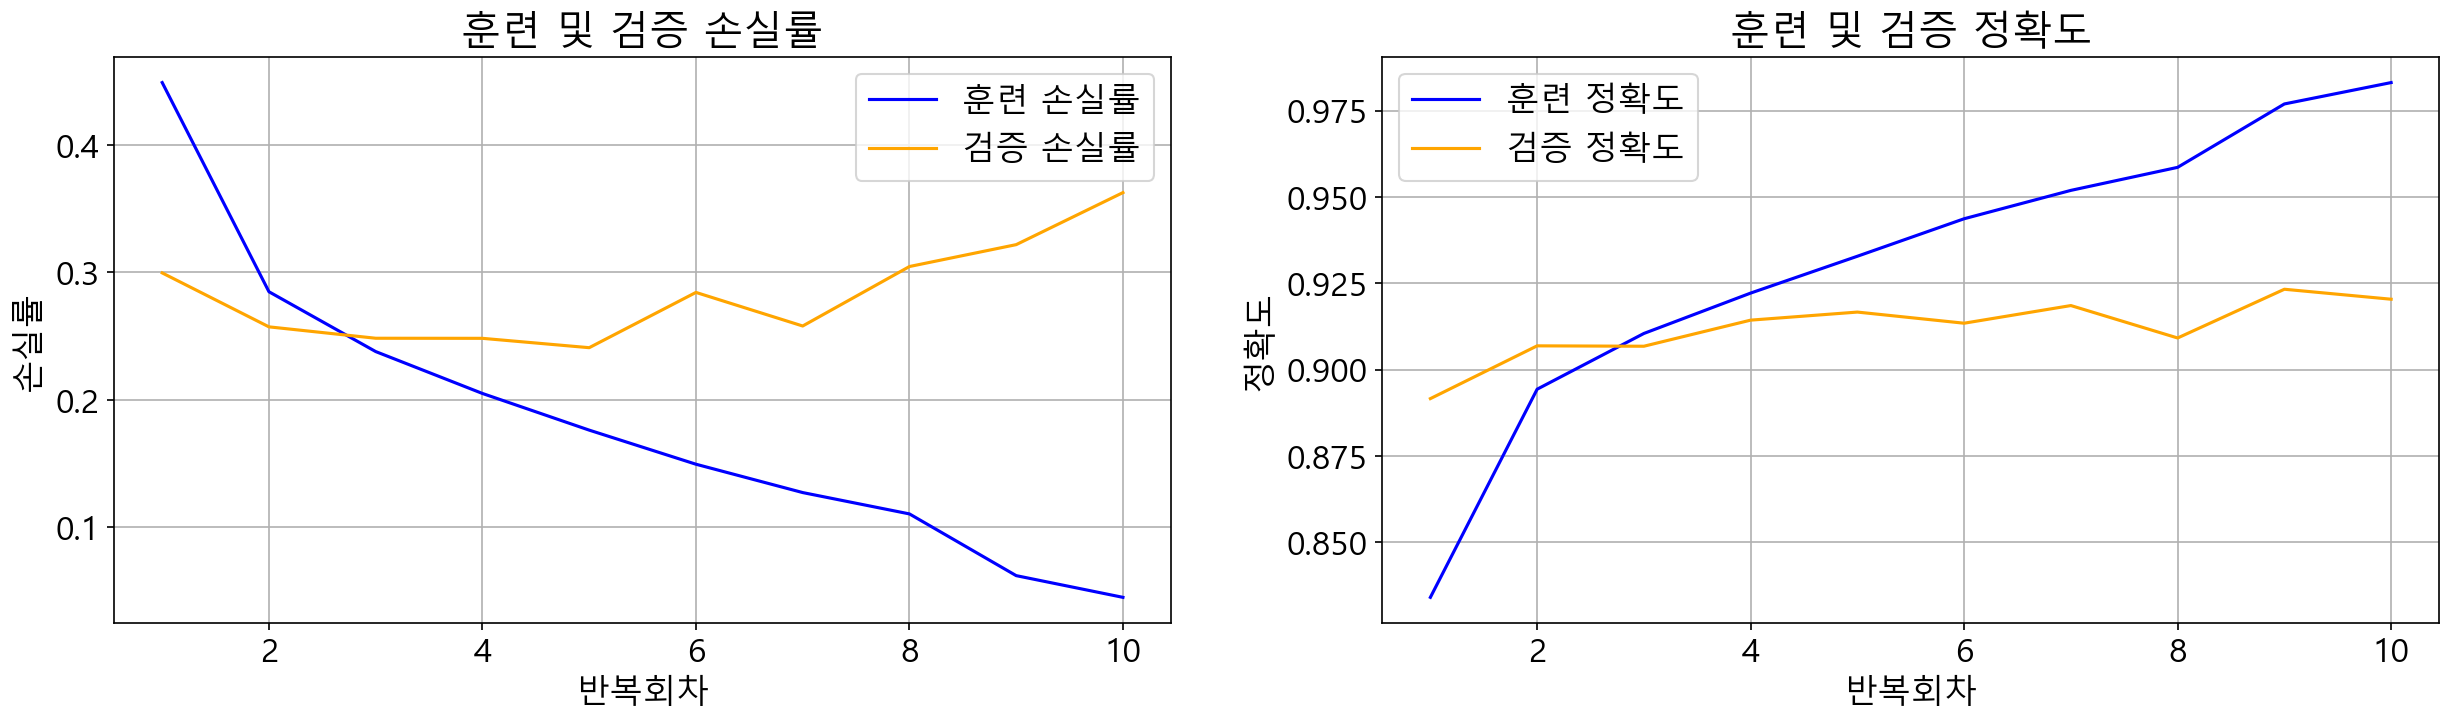

In [45]:
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
# ----------------------------------------
sns.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', label='훈련 손실률', ax=ax1)
sns.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기
# ----------------------------------------
sns.lineplot(x=result_df.index, y='acc', data=result_df, color = 'blue', label = '훈련 정확도', ax=ax2)
sns.lineplot(x=result_df.index, y='val_acc', data=result_df, color = 'orange', label = '검증 정확도', ax=ax2)
ax2.set_title('훈련 및 검증 정확도')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

### 모델 성능 평가

In [46]:
evaluate = model.evaluate(x_test_normal, y_test_one_hot)
print("최종 손실률: %f, 최종 정확도: %f" % (evaluate[0], evaluate[1]))

563/563 [==============================] - 5s 8ms/step - loss: 0.3626 - acc: 0.9204
최종 손실률: 0.362624, 최종 정확도: 0.920389


## 8) 학습 결과 적용
---

### 테스트 데이터에 대한 예측 결과 산정

In [47]:
result = model.predict(x_test_normal)
data_count, case_count = result.shape
print("%d개의 검증 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
result[0]

18000개의 검증 데이터가 10개의 경우의 수를 갖는다.


array([1.8160577e-05, 1.1987581e-06, 6.1250007e-01, 7.5516355e-06,
       3.8716391e-01, 4.0512377e-06, 2.7188117e-04, 2.7871752e-06,
       2.5913967e-05, 4.4414055e-06], dtype=float32)

### 가장 큰 확률 값의 인덱스를 별도 리스트로 추출

In [48]:
arg_result = np.argmax(result, axis=-1)
arg_result

array([2, 3, 4, ..., 5, 4, 7], dtype=int64)

### 데이터 비교

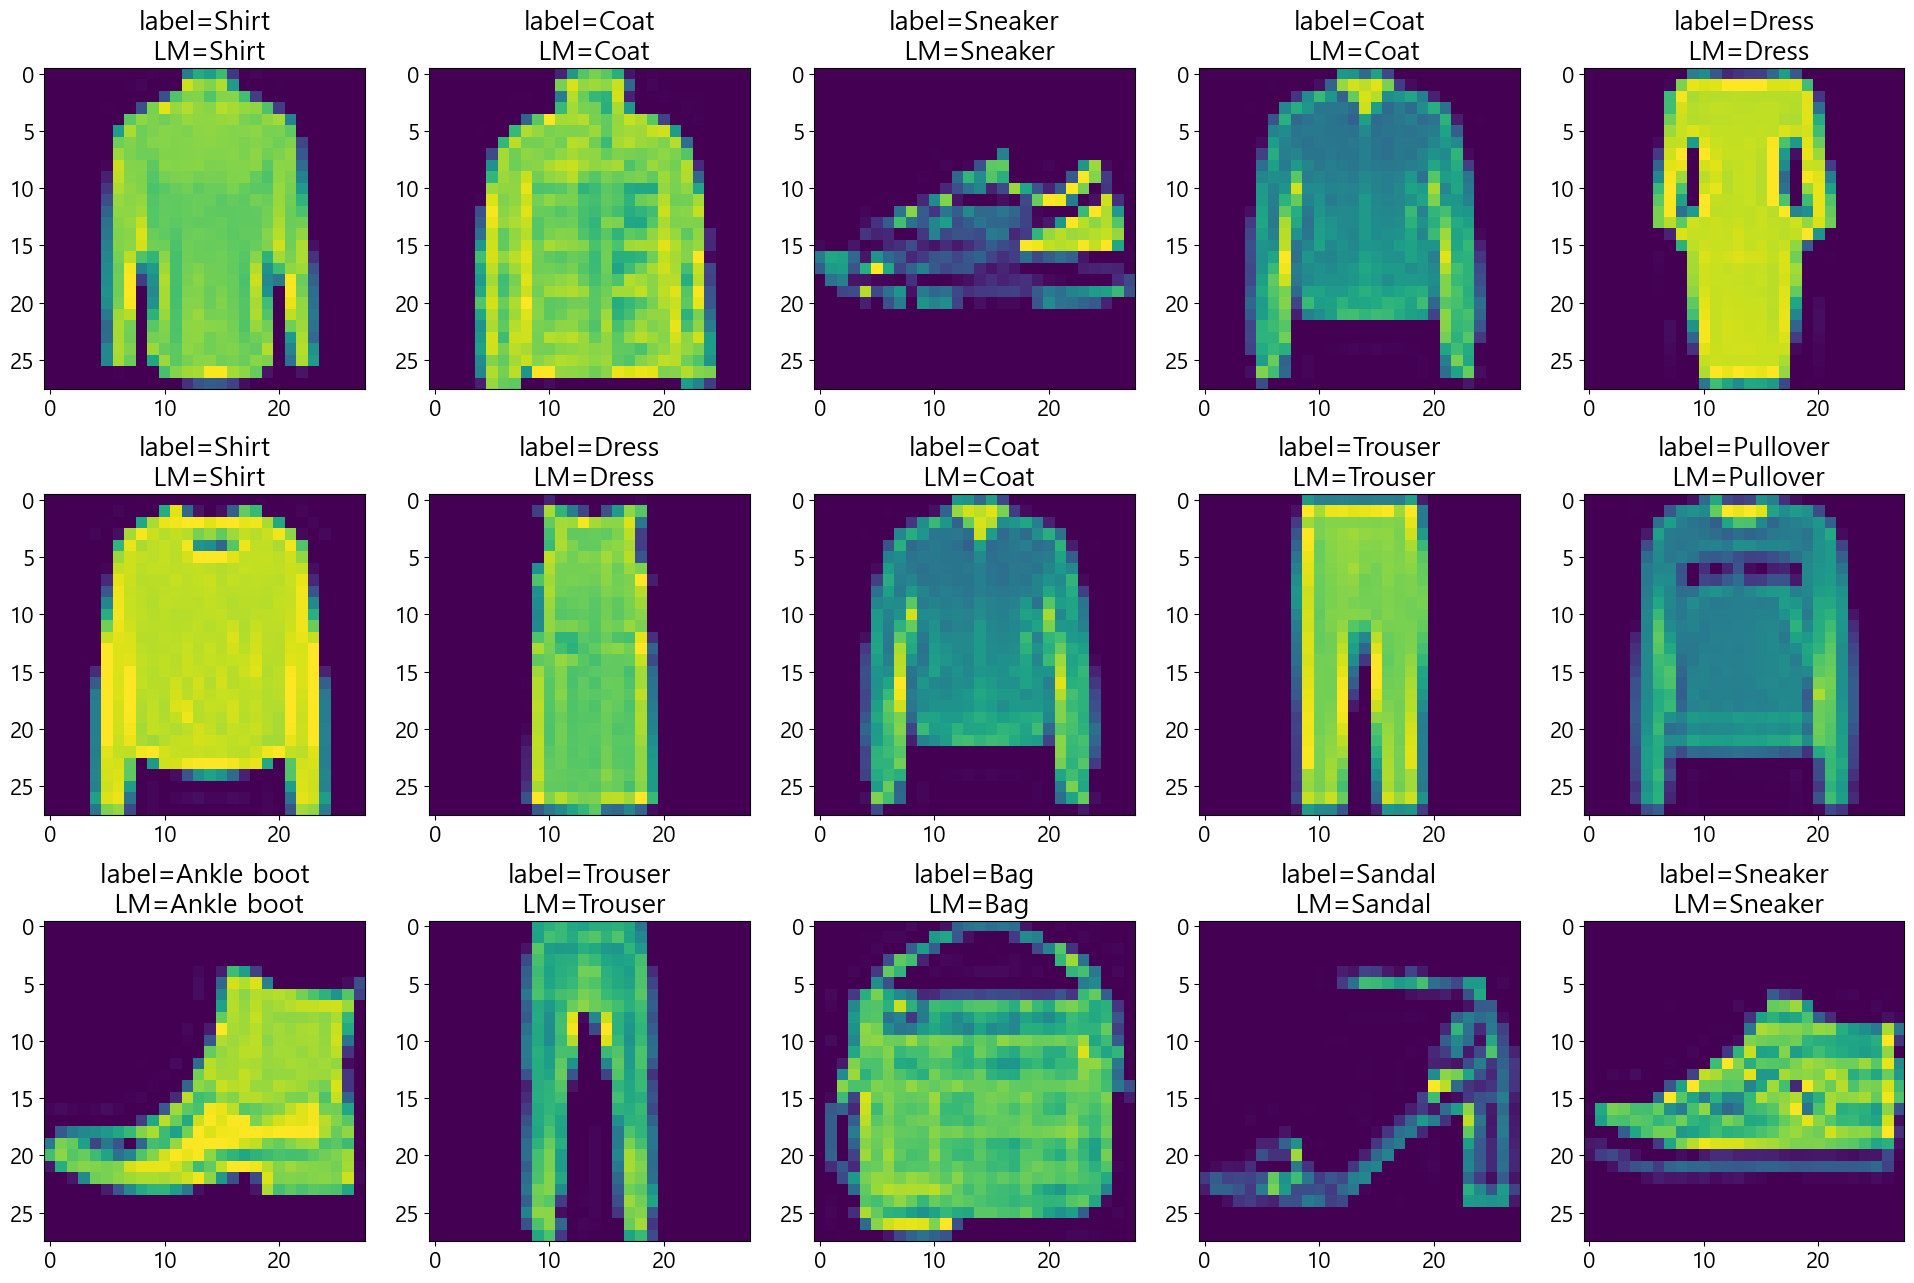

In [55]:
row = 3
col = 5
fig, ax = plt.subplots(row, col, figsize=((col+1)*4, (row+1)*4), dpi=100)

size = row*col
length = len(y_test)

for i in range(0, size):
    k = np.random.randint(length)
    train = x_test[k]
    label = y_test[k]
    ax[i//col][i%col].imshow(train)
    ax[i//col][i%col].set_title("label=%s\n LM=%s" % (class_names[label], class_names[arg_result[k]]))

plt.show()
plt.close()

### 혼동행렬

In [56]:
cm = confusion_matrix(y_test, arg_result)
cmdf2 = DataFrame(cm, columns=list(map(lambda x: "실제값(%d)" % x, range(10))), index=list(map(lambda x: "예측값(%d)" % x, range(10))))
cmdf2

,실제값(0),실제값(1),실제값(2),실제값(3),실제값(4),실제값(5),실제값(6),실제값(7),실제값(8),실제값(9)
예측값(0),1594,4,29,32,1,0,81,0,10,0
예측값(1),2,1807,0,11,3,0,1,0,2,0
예측값(2),34,0,1549,9,151,0,54,0,2,0
예측값(3),27,15,17,1740,25,0,15,0,3,1
예측값(4),4,4,68,49,1647,0,52,0,7,0
예측값(5),0,0,1,0,0,1754,0,18,1,11
예측값(6),264,3,109,48,105,0,1244,0,16,0
예측값(7),0,0,0,0,0,14,0,1718,2,57
예측값(8),2,0,2,4,4,0,3,2,1755,0
예측값(9),0,0,0,1,0,3,0,46,4,1759


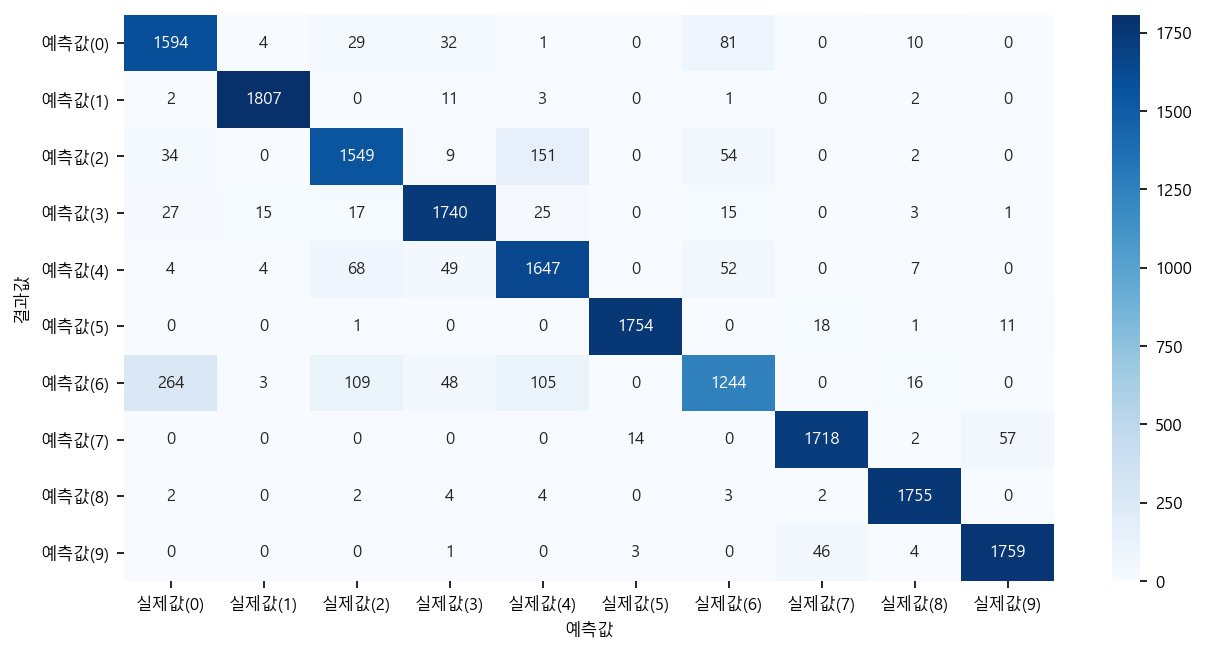

In [57]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 8

fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=150)

# 오차 행렬을 히트맵 그래프로 표현
# -> annot : 그래프의 각 칸에 수치값 출력
# -> fmt : 수치값 출력 format (여기서는 10진수)
# -> cmap : 색상맵 (https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html)
sns.heatmap(cmdf2, annot = True, fmt = 'd', cmap = 'Blues', ax=ax)
ax.set_xlabel('예측값')
ax.set_ylabel('결과값')
plt.show()

### 셔츠와 다른 상의류를 분류하는데 가장 큰 어려움이 있다. 특히 셔츠와 티셔츠가 가장 구분하기 힘들다.

### 분류보고서

In [58]:
from pandas import DataFrame
report = classification_report(y_test, arg_result, output_dict=True)
DataFrame(report).transpose()

,precision,recall,f1-score,support
0,0.827193,0.910337,0.866775,1751.000000
1,0.985816,0.989595,0.987702,1826.000000
2,0.872676,0.861034,0.866816,1799.000000
3,0.918691,0.944113,0.931228,1843.000000
4,0.850723,0.899508,0.874436,1831.000000
5,0.990401,0.982633,0.986502,1785.000000
6,0.857931,0.695361,0.768138,1789.000000
7,0.963004,0.959241,0.961119,1791.000000
8,0.973918,0.990406,0.982093,1772.000000
9,0.962254,0.970215,0.966218,1813.000000
